<a target="_blank" href="https://colab.research.google.com/github/Xornotor/PPGEE-Otimizacao-Exercicios/blob/main/Lista-01-A/Q1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Lista de Exercícios 01-A | Questão 1**

**UFBA** | PPGEE0016 - Otimização

**Aluno:** André Paiva Conrado Rodrigues

In [1]:
# Importação de dependências
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, NonlinearConstraint

## **1. Problema de Otimização**

\begin{equation*}
\begin{aligned}
\text{Minimizar} \\
&& f(\boldsymbol{x}) = 2x_{1} + x_{2}^{2} - 2\\
\text{Sujeito a} \\
c_{1}: && -(x_{1} + 3)^{2} - x_{2}^{2} + 9 \geq 0 \\
c_{2}: && -3x_{1} - 2x_{2} - 6 \geq 0 \\
\end{aligned}
\end{equation*}

## **2. Estimativa manual**

**Trabalhando na primeira restrição:**
\begin{equation*}
\begin{aligned}
-(x_{1} + 3)^{2} - x_{2}^{2} + 9 \geq 0 \\
-(x_{1} + 3)^{2} - x_{2}^{2} \geq -9 \\
\\
(x_{1} + 3)^{2} + x_{2}^{2} \leq 9 \\
\text{Círculo de raio 3 com centro em } (-3, 0)
\end{aligned}
\end{equation*}

In [2]:
# Restrição C1
c1_x1 = (3*np.sin(np.linspace(0, 2*np.pi, 180))) - 3
c1_x2 = (3*np.cos(np.linspace(0, 2*np.pi, 180)))

**Trabalhando na segunda restrição:**
\begin{equation*}
\begin{aligned}
-3x_{1} - 2x_{2} - 6 \geq 0 \\
2x_{2} \leq -3x_{1} - 6 \\
\\
x_{2} \leq -\frac{3x_{1}}{2} - 3 \\
\text{Limite abaixo de uma reta}
\end{aligned}
\end{equation*}

In [3]:
# Restrição C2
c2_x1 = np.linspace(-10, 5, 2)
c2_x2 = -(3.0*c2_x1/2.0) - 3

**Visualizando a região de restrição graficamente:**

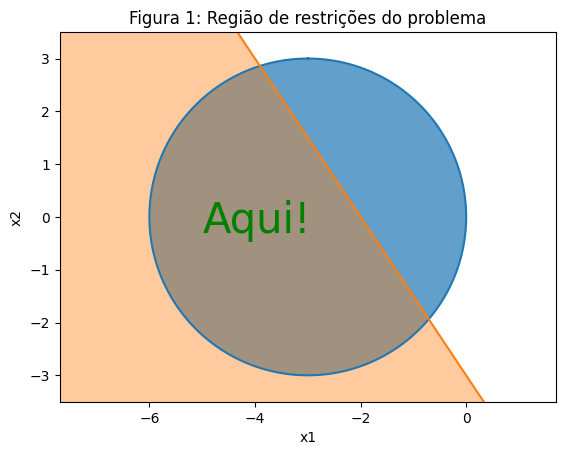

In [4]:
plt.plot(c1_x1, c1_x2)
plt.plot(c2_x1, c2_x2)
plt.text(-5, -0.3, "Aqui!", fontsize=30, color='green')
plt.fill_between(c1_x1, c1_x2, alpha=0.7)
plt.fill_between(c2_x1, c2_x2, -4, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.xlim([-6.5, 0.5])
plt.ylim([-3.5, 3.5])
plt.title("Figura 1: Região de restrições do problema")
plt.show()

**Plotando a função objetivo:**

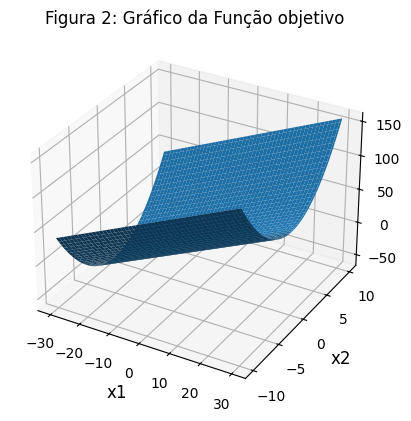

In [5]:
x1 = np.array([np.linspace(-30, 30, 100) for _ in range(100)])
x2 = np.array([np.linspace(-10, 10, 100) for _ in range(100)]).T
z = (2*x1) + (x2**2) - 2

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z)
ax.set_title("Figura 2: Gráfico da Função objetivo")
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
plt.show()

**Derivada parcial da função objetivo em relação a $x_{1}$:**

\begin{equation*}
\begin{aligned}
\frac{\partial f(\boldsymbol{x})}{\partial x_{1}} = 2 \neq 0
\end{aligned}
\end{equation*}

**Derivada parcial da função objetivo em relação a $x_{2}$:**

\begin{equation*}
\begin{aligned}
\frac{\partial f(\boldsymbol{x})}{\partial x_{2}} = 2x_{2} \\
2x_{2} = 0 \implies x_{2} = 0
\end{aligned}
\end{equation*}

**Conclusões em relação ao ponto ótimo:**

Em relação a $x_{2}$, a função chega a seu mínimo quando $x_{2} = 0$.

Em relação a $x_{1}$, desconsiderando restrições, não há um ponto de mínimo: o que se vê é a contribuição de $x_{1}$ para o valor de $f(\boldsymbol{x})$ em um comportamento análogo a uma reta crescente, que vai desde $-\inf$ até $+\inf$; isto é, caso seja escolhido um valor constante para $x_{2}$, ao excursionar o valor de $x_{1}$, o comportamento de $f(\boldsymbol{x})$ será uma reta crescente.

Por conta da condição de $x_{1}$, a conclusão é de que não há ponto ótimo global.

**Ponto mínimo dentro das restrições:**

Como $x_{1}$ contribui para o valor de $f(\boldsymbol{x})$ com um comportamento análogo a uma reta crescente, para minimizar o valor de $f(\boldsymbol{x})$ dentro das restrições, devemos escolher o menor valor possível de $x_{1}$.

Com a escolha de $x_{2} = 0$ motivada pelo valor encontrado na derivada primeira, o menor valor possível de $x_{1}$ dentro das restrições é $x_{1} = -6$.

\begin{equation*}
\begin{aligned}
\boldsymbol{x} = (-6, 0) \\
f(\boldsymbol{x}) = 2x_{1} + x_{2}^{2} - 2 \\
f(\boldsymbol{x}) = 2 \cdot (-6) + 0^{2} - 2 \\
f(\boldsymbol{x}) = -14
\end{aligned}
\end{equation*}


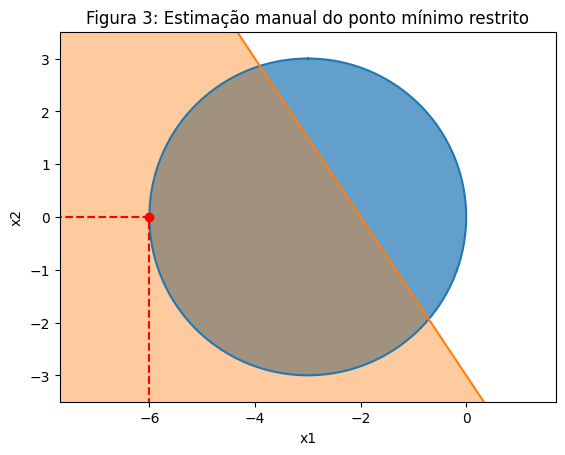

In [6]:
plt.plot(c1_x1, c1_x2)
plt.plot(c2_x1, c2_x2)
plt.fill_between(c1_x1, c1_x2, alpha=0.7)
plt.fill_between(c2_x1, c2_x2, -4, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.xlim([-6.5, 0.5])
plt.ylim([-3.5, 3.5])
plt.scatter([-6], [0], color='red', zorder=2.5)
plt.plot([-6, -6], [-4, 0], color='red', zorder=2.5, linestyle='dashed')
plt.plot([-10, -6], [0, 0], color='red', zorder=2.5, linestyle='dashed')
plt.title("Figura 3: Estimação manual do ponto mínimo restrito")
plt.show()

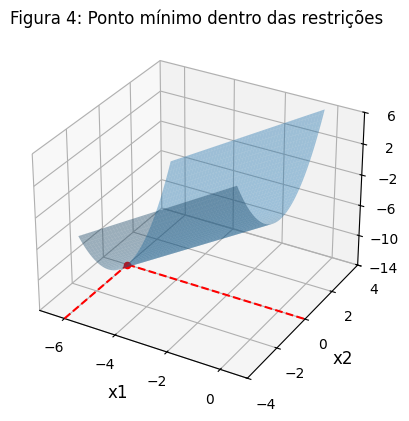

In [7]:
x1 = np.array([np.linspace(-6, 0, 100) for _ in range(100)])
x2 = np.array([np.linspace(-3, 3, 100) for _ in range(100)]).T
z = (2*x1) + (x2**2) - 2

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z, alpha=0.4)
ax.scatter3D(-6, 0, -14, color='red')
ax.plot([-6, 1], [-0, 0], [-14, -14], color='red', linestyle='dashed')
ax.plot([-6, -6], [-4, 0], [-14, -14], color='red', linestyle='dashed')
ax.set_title("Figura 4: Ponto mínimo dentro das restrições")
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_xlim([-7, 1])
ax.set_ylim([-4, 4])
ax.set_zlim([-14, 6])
ax.set_xticks([-6, -4, -2, 0])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.set_zticks([-14, -10, -6, -2, 2, 6])
plt.show()

## **3. Solução por algoritmo**

In [8]:
# Função objetivo e funções de restrição
obj = lambda x: (2*x[0]) + (x[1]**2) - 2 
c1_fun = lambda x: -(x[0] + 3)**2 - (x[1]**1) + 9
c2_fun = lambda x: -(3*x[0]) - (2*x[1]) - 6

# Restrições
cons = [
        NonlinearConstraint(c1_fun, 0, np.inf),
        NonlinearConstraint(c2_fun, 0, np.inf)
       ]

#Otimização
res = minimize(obj, (0, 0), method='COBYQA', constraints=cons)
res

 message: The lower bound for the trust-region radius has been reached
 success: True
  status: 0
     fun: -14.027525226526603
       x: [-6.027e+00 -1.652e-01]
     nit: 44
   maxcv: 8.881784197001252e-15
    nfev: 35

Por meio da otimização por algoritmo, foi encontrado o ponto $(-6.027; -0.1652)$, muito próximo do ponto $(-6,0)$ estimado pelos cálculos manuais. O valor mínimo da função encontrado foi $-14.02$, próximo ao $-14$ encontrado pela estimativa manual.

Para verificar a validade da solução algorítmica, vamos analisar se os valores encontrados para $x_1$ e $x_2$ atendem às restrições.

In [9]:
c1_fun(res.x)

np.float64(-8.881784197001252e-15)

A restrição 1 parece não ser seguida à risca. $c_1$ foi definida de tal modo que $c_{1} \geq 0$, o que não ocorre por um pequeno desvio de $-8.88 \times 10^{-15}$. Tal desvio pode ter ocorrido por questões de precisão numérica e imprecisões de cálculos decorrentes de limitações relacionadas à representação numérica nos computadores.

In [10]:
c2_fun(res.x)

np.float64(12.412519974036645)

A restrição 2 parece ter sido obedecida.

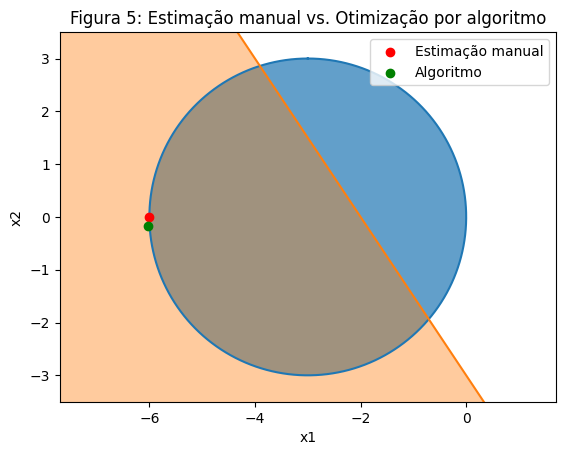

In [11]:
plt.plot(c1_x1, c1_x2)
plt.plot(c2_x1, c2_x2)
plt.fill_between(c1_x1, c1_x2, alpha=0.7)
plt.fill_between(c2_x1, c2_x2, -4, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.xlim([-6.5, 0.5])
plt.ylim([-3.5, 3.5])
plt.scatter([-6], [0], color='red', zorder=2.5, label='Estimação manual')
plt.scatter(res.x[0], res.x[1], color='green', zorder=2.5, label='Algoritmo')
plt.legend()
plt.title("Figura 5: Estimação manual vs. Otimização por algoritmo")
plt.show()